In [1]:
import findspark
findspark.init("C:\\spark")

In [2]:
from pyspark import SparkContext
sc = SparkContext()

## reduceByKey

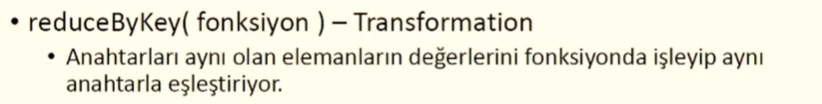

In [130]:
liste1 = [("Fiz-I", 73),
         ("Mat-I", 63),
         ("Kimya", 66),
         ("Mat-I", 44),
         ("Mat-I", 78)]

liste1

[('Fiz-I', 73), ('Mat-I', 63), ('Kimya', 66), ('Mat-I', 44), ('Mat-I', 78)]

In [131]:
RDD_1 = sc.parallelize(liste1)
RDD_1.collect()

[('Fiz-I', 73), ('Mat-I', 63), ('Kimya', 66), ('Mat-I', 44), ('Mat-I', 78)]

In [132]:
RDD_1.reduceByKey(lambda x, y: x+y).collect()

[('Kimya', 66), ('Fiz-I', 73), ('Mat-I', 185)]

## getNumPartitions
Returns the number of partitions in RDD

In [112]:
# Spark splited the RDD into 8 partitions as a default.
RDD_1.reduceByKey(lambda x, y: x+y).getNumPartitions()

8

In [113]:
# We can assign the number of the partitions.
RDD_1.reduceByKey(lambda x, y: x+y, 10).getNumPartitions()

10

## groupByKey

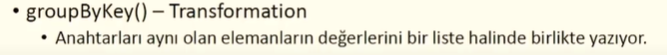

In [6]:
RDD_1.groupByKey().collect()

[('Kimya', <pyspark.resultiterable.ResultIterable at 0x17e1c498a00>),
 ('Fiz-I', <pyspark.resultiterable.ResultIterable at 0x17e1c498970>),
 ('Mat-I', <pyspark.resultiterable.ResultIterable at 0x17e1c4988b0>)]

In [14]:
[(i[0], list(i[1])) for i in RDD_1.groupByKey().collect()]

[('Kimya', [66]), ('Fiz-I', [73]), ('Mat-I', [63, 44, 78])]

In [9]:
# Alternative
# reduceByKey ile yukarida yapilan isi groupByKey ile de yapabiliriz.
RDD_1.groupByKey().map(lambda t: (t[0], sum(t[1]))).collect()

[('Kimya', 66), ('Fiz-I', 73), ('Mat-I', 185)]

## combineByKey

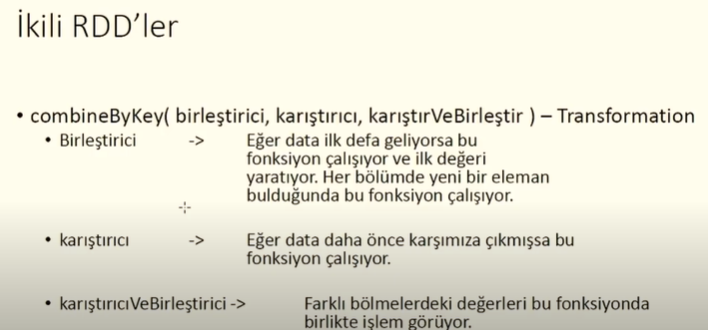

In [15]:
liste2 = [("Mat-ı", 68),
         ("Fzk-ı", 45),
         ("Kimya", 94),
         ("Tarih", 79)]

In [17]:
# liste1 ve liste2 yi birlestirip bir RDD de bir araya getirecegiz.
sc.parallelize(liste1 + liste2).collect()

[('Fiz-I', 73),
 ('Mat-I', 63),
 ('Kimya', 66),
 ('Mat-I', 44),
 ('Mat-I', 78),
 ('Mat-ı', 68),
 ('Fzk-ı', 45),
 ('Kimya', 94),
 ('Tarih', 79)]

In [19]:
RDD_2 = sc.parallelize(liste1 + liste2)
RDD_2.collect()

[('Fiz-I', 73),
 ('Mat-I', 63),
 ('Kimya', 66),
 ('Mat-I', 44),
 ('Mat-I', 78),
 ('Mat-ı', 68),
 ('Fzk-ı', 45),
 ('Kimya', 94),
 ('Tarih', 79)]

In [20]:
toplam = RDD_2.combineByKey((lambda x: (x,1)), 
                            (lambda x, y: (x[0] + y, x[1] + y[0])),
                            (lambda x, y: (x[0] + y[0], x[1] + y[1])))
toplam.collect()

[('Kimya', (160, 2)),
 ('Fiz-I', (73, 1)),
 ('Mat-ı', (68, 1)),
 ('Fzk-ı', (45, 1)),
 ('Tarih', (79, 1)),
 ('Mat-I', (185, 3))]

In [21]:
toplam.map(lambda xy: (xy[0], xy[1][0]/xy[1][1])).collect()

[('Kimya', 80.0),
 ('Fiz-I', 73.0),
 ('Mat-ı', 68.0),
 ('Fzk-ı', 45.0),
 ('Tarih', 79.0),
 ('Mat-I', 61.666666666666664)]

## mapValues

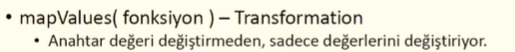

In [22]:
RDD_2.mapValues(lambda x: x+1).collect()

[('Fiz-I', 74),
 ('Mat-I', 64),
 ('Kimya', 67),
 ('Mat-I', 45),
 ('Mat-I', 79),
 ('Mat-ı', 69),
 ('Fzk-ı', 46),
 ('Kimya', 95),
 ('Tarih', 80)]

In [23]:
# Alternative with map
RDD_2.map(lambda x: (x[0], x[1] +1)).collect()

[('Fiz-I', 74),
 ('Mat-I', 64),
 ('Kimya', 67),
 ('Mat-I', 45),
 ('Mat-I', 79),
 ('Mat-ı', 69),
 ('Fzk-ı', 46),
 ('Kimya', 95),
 ('Tarih', 80)]

**Sadece values degistirilecekse mapValues kullanmak daha avantajlidir, hizli calisir.**

## flatMapValues

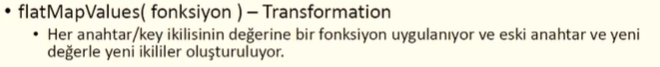

In [63]:
RDD_3 = sc.parallelize([("fruit", "apple,banana,orange"),
                       ("animal", "zebra,panda"),
                       ("stuff", "table,lamp,book")])

In [64]:
RDD_3.flatMapValues(lambda x: x.split(",")).collect()

[('fruit', 'apple'),
 ('fruit', 'banana'),
 ('fruit', 'orange'),
 ('animal', 'zebra'),
 ('animal', 'panda'),
 ('stuff', 'table'),
 ('stuff', 'lamp'),
 ('stuff', 'book')]

## sortByKey, keys, values

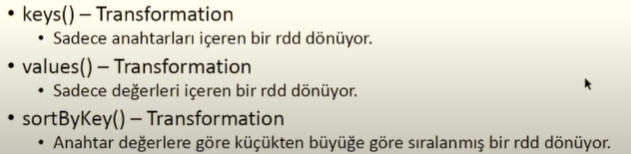

In [65]:
# Get only keys
RDD_3.keys().collect()

['fruit', 'animal', 'stuff']

In [66]:
# Get only values
RDD_3.values().collect()

['apple,banana,orange', 'zebra,panda', 'table,lamp,book']

In [67]:
RDD_3.sortByKey().collect()

[('animal', 'zebra,panda'),
 ('fruit', 'apple,banana,orange'),
 ('stuff', 'table,lamp,book')]

## subtract, subtractByKey

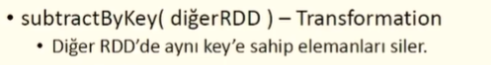

In [68]:
RDD_4 = sc.parallelize([("animal", "zebra,panda"),
                       ("language", "python,java,scala"),
                       ('stuff', "pencil,notebook,laptop"),
                       ("yield", "apple,banana,orange")])
RDD_4.collect()

[('animal', 'zebra,panda'),
 ('language', 'python,java,scala'),
 ('stuff', 'pencil,notebook,laptop'),
 ('yield', 'apple,banana,orange')]

In [69]:
# ayni key ve values a sahip items i siler.
RDD_3.subtract(RDD_4).collect()

[('fruit', 'apple,banana,orange'), ('stuff', 'table,lamp,book')]

In [70]:
# ayni key e sahip items i siler.
RDD_3.subtractByKey(RDD_4).collect()

[('fruit', 'apple,banana,orange')]

## join, rightOuterJoin, leftOuterJoin

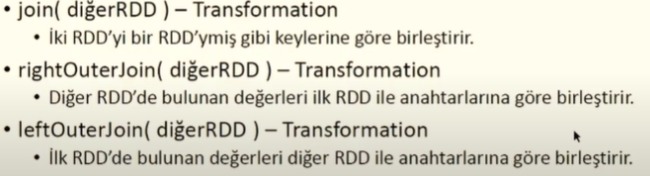

In [71]:
# iki RDD yi ortak key e gore innerjoin yapar.
RDD_3.join(RDD_4).collect()

[('stuff', ('table,lamp,book', 'pencil,notebook,laptop')),
 ('animal', ('zebra,panda', 'zebra,panda'))]

In [72]:
# iki RDD yi rightjoin yapar.
RDD_3.rightOuterJoin(RDD_4).collect()

[('stuff', ('table,lamp,book', 'pencil,notebook,laptop')),
 ('language', (None, 'python,java,scala')),
 ('yield', (None, 'apple,banana,orange')),
 ('animal', ('zebra,panda', 'zebra,panda'))]

In [73]:
# iki RDD yi leftjoin yapar.
RDD_3.leftOuterJoin(RDD_4).collect()

[('stuff', ('table,lamp,book', 'pencil,notebook,laptop')),
 ('fruit', ('apple,banana,orange', None)),
 ('animal', ('zebra,panda', 'zebra,panda'))]

## cogroup

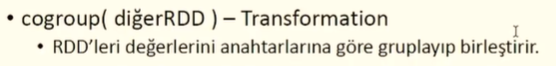

In [74]:
print(f"RDD_3:\n{RDD_3.collect()}\n\n\
RDD_4:\n{RDD_4.collect()}")

RDD_3:
[('fruit', 'apple,banana,orange'), ('animal', 'zebra,panda'), ('stuff', 'table,lamp,book')]

RDD_4:
[('animal', 'zebra,panda'), ('language', 'python,java,scala'), ('stuff', 'pencil,notebook,laptop'), ('yield', 'apple,banana,orange')]


In [75]:
RDD_3.cogroup(RDD_4).collect()

[('stuff',
  (<pyspark.resultiterable.ResultIterable at 0x17e1c5315b0>,
   <pyspark.resultiterable.ResultIterable at 0x17e1c523130>)),
 ('fruit',
  (<pyspark.resultiterable.ResultIterable at 0x17e1c523280>,
   <pyspark.resultiterable.ResultIterable at 0x17e1c5238b0>)),
 ('language',
  (<pyspark.resultiterable.ResultIterable at 0x17e1c5231f0>,
   <pyspark.resultiterable.ResultIterable at 0x17e1c523310>)),
 ('yield',
  (<pyspark.resultiterable.ResultIterable at 0x17e1c523430>,
   <pyspark.resultiterable.ResultIterable at 0x17e1c5233a0>)),
 ('animal',
  (<pyspark.resultiterable.ResultIterable at 0x17e1c523be0>,
   <pyspark.resultiterable.ResultIterable at 0x17e1c523340>))]

In [80]:
[(RDD_3, tuple(map(list, RDD_4))) for RDD_3, RDD_4 in sorted(list(RDD_3.cogroup(RDD_4).collect()))]

[('animal', (['zebra,panda'], ['zebra,panda'])),
 ('fruit', (['apple,banana,orange'], [])),
 ('language', ([], ['python,java,scala'])),
 ('stuff', (['table,lamp,book'], ['pencil,notebook,laptop'])),
 ('yield', ([], ['apple,banana,orange']))]

## aggregate

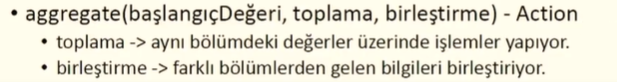

In [84]:
numbers = sc.parallelize([1,2,3,4,5])

In [85]:
sumof = lambda k, v: (k[0] + [v], k[1] + v)
agg = lambda k, v: (k[0] + v[0] , k[1] + v[1])
numbers.aggregate(([],0),
                 sumof,
                 agg)

([1, 2, 3, 4, 5], 15)

## countByKey, countByValue

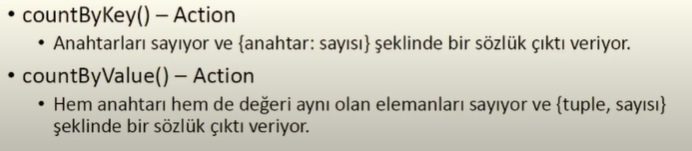

In [89]:
RDD_5 = sc.parallelize([("kolay_dil", "python"),
                       ("zor_dil", "C"),
                       ("kolay_dil", "javascript"),
                       ("kolay_dil", "html"),
                       ("zor_dil", "C++"),
                       ("zor_dil", "Java"),
                       ("zor_dil", "C")])

In [90]:
RDD_5.countByKey()

defaultdict(int, {'kolay_dil': 3, 'zor_dil': 4})

In [91]:
RDD_5.countByValue()

defaultdict(int,
            {('kolay_dil', 'python'): 1,
             ('zor_dil', 'C'): 2,
             ('kolay_dil', 'javascript'): 1,
             ('kolay_dil', 'html'): 1,
             ('zor_dil', 'C++'): 1,
             ('zor_dil', 'Java'): 1})

## groupBy

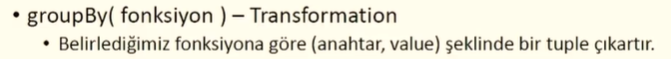

In [94]:
animal = sc.parallelize(["panda",
                        "penguen",
                        "mouse",
                         "parrot",
                         "lion",
                         "mule"])

In [95]:
# ilk harflerine gore tuple olusturur
animal.groupBy(lambda x: x[0]).collect()

[('l', <pyspark.resultiterable.ResultIterable at 0x17e1c531cd0>),
 ('m', <pyspark.resultiterable.ResultIterable at 0x17e1c55e880>),
 ('p', <pyspark.resultiterable.ResultIterable at 0x17e1c55e580>)]

In [96]:
[(k, list(v)) for (k, v) in animal.groupBy(lambda x:  x[0]).collect()]

[('l', ['lion']),
 ('m', ['mouse', 'mule']),
 ('p', ['panda', 'penguen', 'parrot'])]

## lookup

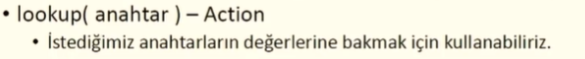

In [97]:
RDD_5.collect()

[('kolay_dil', 'python'),
 ('zor_dil', 'C'),
 ('kolay_dil', 'javascript'),
 ('kolay_dil', 'html'),
 ('zor_dil', 'C++'),
 ('zor_dil', 'Java'),
 ('zor_dil', 'C')]

In [98]:
RDD_5.lookup("kolay_dil")

['python', 'javascript', 'html']

## zip

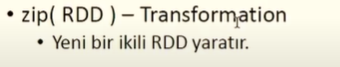

In [99]:
numbers.collect()

[1, 2, 3, 4, 5]

In [100]:
squared = numbers.map(lambda x: x**2)
squared.collect()

[1, 4, 9, 16, 25]

In [101]:
numbers.zip(squared).collect()

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

## Example

In [138]:
zoo = sc.parallelize([("panda", 0),
                     ("zebra", 3),
                     ("snake", 1),
                     ("panda", 5),
                     ("zebra", 4),
                     ("snake", 2),
                     ("zebra", 1)])

In [139]:
zoo.groupByKey().collect()

[('panda', <pyspark.resultiterable.ResultIterable at 0x17e1c55e640>),
 ('zebra', <pyspark.resultiterable.ResultIterable at 0x17e1c55ec10>),
 ('snake', <pyspark.resultiterable.ResultIterable at 0x17e1c55ec40>)]

In [140]:
for i in zoo.groupByKey().collect():
    print((i[0], list(i[1])))

('panda', [0, 5])
('zebra', [3, 4, 1])
('snake', [1, 2])


In [141]:
[(i[0], list(i[1])) for i in zoo.groupByKey().collect()]

[('panda', [0, 5]), ('zebra', [3, 4, 1]), ('snake', [1, 2])]

**GroupByKey Kullanmadan yukaridaki sonucu bulunuz.**

In [142]:
zoo.mapValues(lambda x: (x,  1)).collect()

[('panda', (0, 1)),
 ('zebra', (3, 1)),
 ('snake', (1, 1)),
 ('panda', (5, 1)),
 ('zebra', (4, 1)),
 ('snake', (2, 1)),
 ('zebra', (1, 1))]

In [143]:
zoo.mapValues(lambda x: (x,  1)).reduceByKey(lambda x, y: [x[0], y[0]]).collect()

[('panda', [0, 5]), ('zebra', [3, 1]), ('snake', [1, 2])]